In [2]:
using EnvelopeApproximation
using EnvelopeApproximation.BubbleBasics
using EnvelopeApproximation.BubblesIntegration
using EnvelopeApproximation.StressEnergyTensor
import LinearAlgebra: norm
import Meshes: coordinates
using Plots

Point3 = EnvelopeApproximation.Point3


Point3 (alias for Meshes.Point{3, Float64})

# Setting up the bubble

In [3]:
R = 1.
bubbles = Bubbles([Bubble(Point3(0., 0., 0.), R)])

Bubbles(Bubble[Bubble(Point(0.0, 0.0, 0.0), 1.0)])

# Setting up the k values

In [4]:
k_0 = 2π / R
ks = LinRange(k_0 / 10, k_0 * 10, 1000)
k_vecs = (x -> Point3(0., 0., x)).(ks)
norm(p:: Point3) = norm(coordinates(p), 2)


norm (generic function with 23 methods)

In [5]:
k_vecs

1000-element Vector{Meshes.Point3}:
 Point(0.0, 0.0, 0.6283185307179586)
 Point(0.0, 0.0, 0.6905843310593779)
 Point(0.0, 0.0, 0.7528501314007973)
 Point(0.0, 0.0, 0.8151159317422165)
 Point(0.0, 0.0, 0.8773817320836359)
 Point(0.0, 0.0, 0.9396475324250553)
 Point(0.0, 0.0, 1.0019133327664744)
 Point(0.0, 0.0, 1.0641791331078938)
 Point(0.0, 0.0, 1.1264449334493132)
 Point(0.0, 0.0, 1.1887107337907326)
 ⋮
 Point(0.0, 0.0, 62.333726669064504)
 Point(0.0, 0.0, 62.395992469405925)
 Point(0.0, 0.0, 62.45825826974735)
 Point(0.0, 0.0, 62.52052407008877)
 Point(0.0, 0.0, 62.58278987043018)
 Point(0.0, 0.0, 62.6450556707716)
 Point(0.0, 0.0, 62.707321471113026)
 Point(0.0, 0.0, 62.76958727145445)
 Point(0.0, 0.0, 62.83185307179586)

# Volume Integral

## Analytic Computation

In [6]:
k_vecs

1000-element Vector{Meshes.Point3}:
 Point(0.0, 0.0, 0.6283185307179586)
 Point(0.0, 0.0, 0.6905843310593779)
 Point(0.0, 0.0, 0.7528501314007973)
 Point(0.0, 0.0, 0.8151159317422165)
 Point(0.0, 0.0, 0.8773817320836359)
 Point(0.0, 0.0, 0.9396475324250553)
 Point(0.0, 0.0, 1.0019133327664744)
 Point(0.0, 0.0, 1.0641791331078938)
 Point(0.0, 0.0, 1.1264449334493132)
 Point(0.0, 0.0, 1.1887107337907326)
 ⋮
 Point(0.0, 0.0, 62.333726669064504)
 Point(0.0, 0.0, 62.395992469405925)
 Point(0.0, 0.0, 62.45825826974735)
 Point(0.0, 0.0, 62.52052407008877)
 Point(0.0, 0.0, 62.58278987043018)
 Point(0.0, 0.0, 62.6450556707716)
 Point(0.0, 0.0, 62.707321471113026)
 Point(0.0, 0.0, 62.76958727145445)
 Point(0.0, 0.0, 62.83185307179586)

In [7]:
ks

1000-element LinRange{Float64, Int64}:
 0.628319, 0.690584, 0.75285, 0.815116, …, 62.6451, 62.7073, 62.7696, 62.8319

In [8]:
R

1.0

In [9]:
analytic_integral = @. 4 * π * (sin(ks * R) - (ks * R) * cos(ks * R)) / (ks ^ 3)

1000-element Vector{Float64}:
  4.02573800486756
  3.992396593237315
  3.956132233713158
  3.917004497358279
  3.8750775260124293
  3.830419895341522
  3.783104468633298
  3.7332082416971475
  3.6808121792475803
  3.6260010431712386
  ⋮
 -0.0028659463375400604
 -0.002947794846487689
 -0.0030179150632339852
 -0.0030760827356520327
 -0.0031221206420121556
 -0.003155899087592522
 -0.003177336216235616
 -0.0031863981363832615
 -0.0031830988618379067

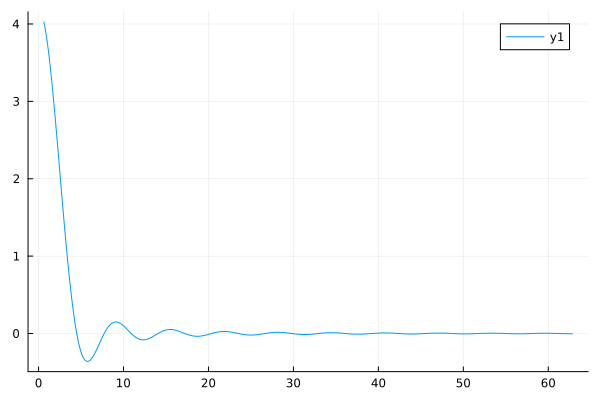

In [11]:
plot(ks, analytic_integral)

## Numeric Integral

In [58]:
import EnvelopeApproximation.StressEnergyTensor: volume_integral
n_v, n_ϕ, n_μ = 40, 10, 200
ΔV = 1.
numeric_integral = volume_integral(k_vecs, bubbles, n_v, n_ϕ, n_μ, ΔV) |> real

1000-element Vector{Float64}:
 4.025712739046832
 3.992365984490884
 3.9560957439376363
 3.9169615797919
 3.875027624671391
 3.8303624444993227
 3.7830388923467266
 3.7331339533807992
 3.6807285812981316
 3.6259075266445535
 ⋮
 0.007487245345817139
 0.007359760739212786
 0.007241569668993981
 0.007132915430275428
 0.007033993809350116
 0.006944952559604624
 0.006865891067266461
 0.0067968602075352035
 0.006737862390925791

In [59]:
numeric_integral

1000-element Vector{Float64}:
 4.025712739046832
 3.992365984490884
 3.9560957439376363
 3.9169615797919
 3.875027624671391
 3.8303624444993227
 3.7830388923467266
 3.7331339533807992
 3.6807285812981316
 3.6259075266445535
 ⋮
 0.007487245345817139
 0.007359760739212786
 0.007241569668993981
 0.007132915430275428
 0.007033993809350116
 0.006944952559604624
 0.006865891067266461
 0.0067968602075352035
 0.006737862390925791

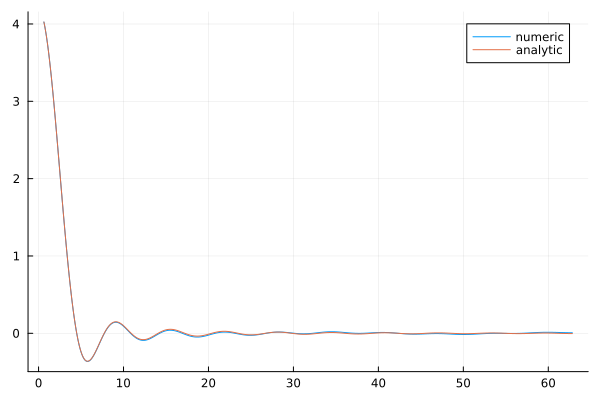

In [60]:
plot(ks, numeric_integral, label="numeric")
plot!(ks, analytic_integral, label="analytic")

### zoom in on ends

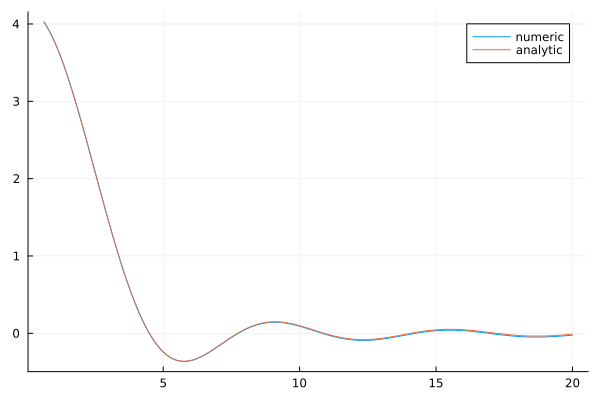

In [61]:
small_ks = ks .< 20
plot(ks[small_ks], numeric_integral[small_ks], label="numeric")
plot!(ks[small_ks], analytic_integral[small_ks], label="analytic")

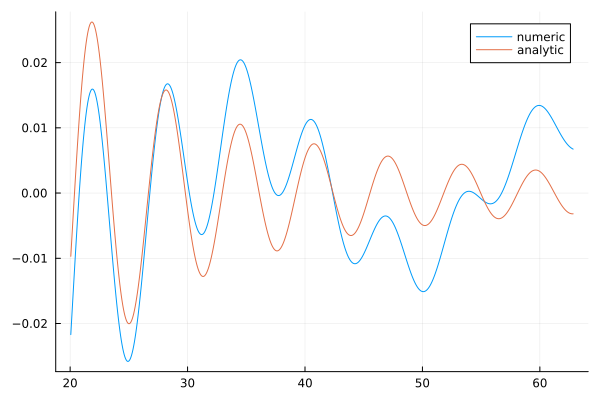

In [62]:
large_ks = ks .> 20
plot(ks[large_ks], numeric_integral[large_ks], label="numeric")
plot!(ks[large_ks], analytic_integral[large_ks], label="analytic")